<a href="https://colab.research.google.com/github/hitesh-pathak/DS_assessment/blob/main/Bike_demand_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline


In [133]:
### import pre processed csv from github

df = pd.read_csv('https://github.com/hitesh-pathak/DS_assessment/raw/main/pre_processed_data.csv')
df.head()

,year,month,weekday,holiday,workingday,season,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2018,January,Monday,0,1,s1,w2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018,February,Thursday,0,1,s1,w2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018,March,Thursday,0,1,s1,w1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018,April,Sunday,0,1,s1,w1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018,May,Tuesday,0,1,s1,w1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [134]:
df_cols = df.columns.tolist()
cat_cols = df_cols[0:7]
num_cols = df_cols[7:-3]
print(cat_cols, num_cols)

## need to convert categorical data, as it's saved as object dtype in csv files.

df.loc[:, cat_cols] = df[cat_cols].astype('category')

['year', 'month', 'weekday', 'holiday', 'workingday', 'season', 'weather'] ['temp', 'atemp', 'humidity', 'windspeed']


In [82]:
## set style

sns.set_palette('pastel')
sns.set_style('darkgrid')

# rcParams['figure.figsize'] = 6, 6

**Visualization and EDA**

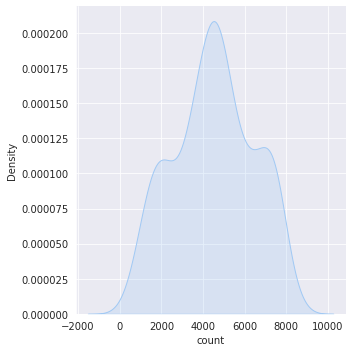

In [105]:
sns.displot(df, x='count', kind='kde', fill='true')

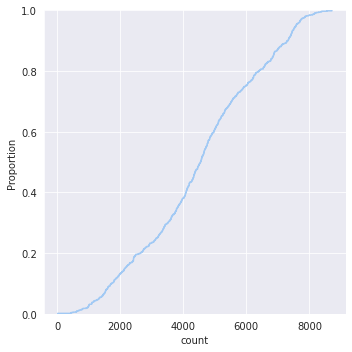

In [107]:
sns.displot(df, x='count', kind='ecdf',)

> Categorical fields:

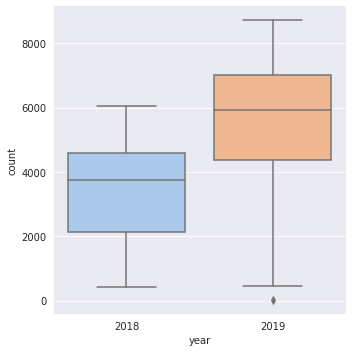

In [83]:
## year vs bike demand
sns.catplot(x='year', y='count', data=df, kind='box')

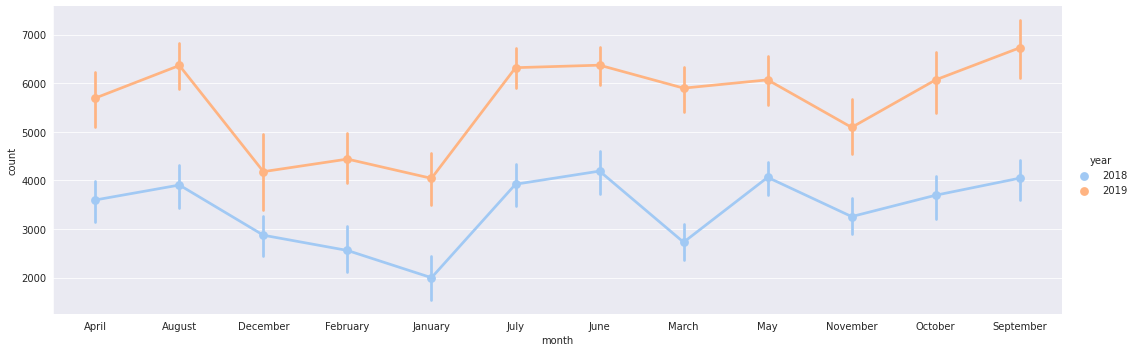

In [84]:
sns.catplot(data=df, x='month', y='count', kind='point', aspect=3, hue='year')

> Demand is high around May to September, and reaches minimum during Jan and Feb.

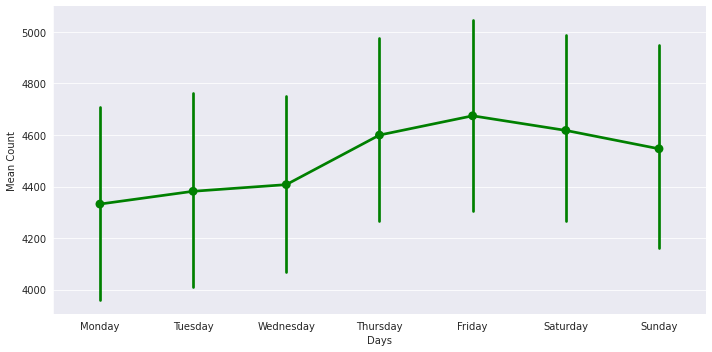

In [85]:
### average count vs. days

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

p = sns.catplot(data=df, x='weekday', y='count', kind='point', aspect=2, color='green', order=days)
p.set_axis_labels('Days', 'Mean Count')

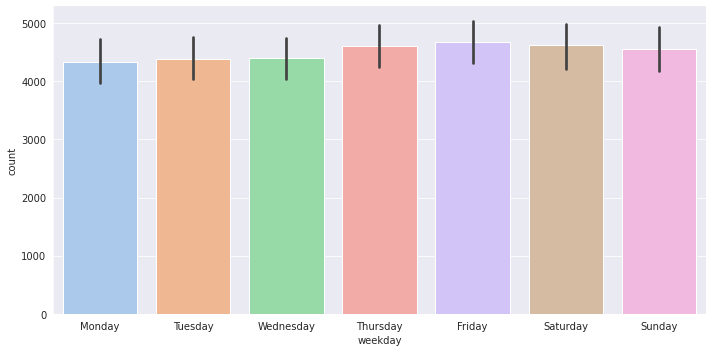

In [86]:
p = sns.catplot(data=df, x='weekday', y='count', kind='bar', aspect=2, order=days)

> Count increases near the end of the week peaking on Fridays, but the difference is not very big

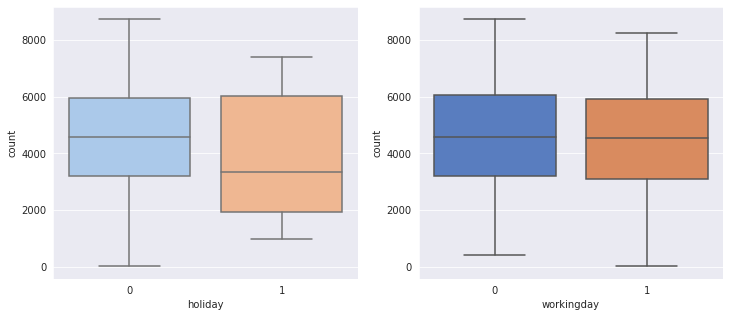

In [87]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.boxplot(x='holiday', y='count', data=df, ax=ax[0])
sns.boxplot(x='workingday', y='count', data=df, ax=ax[1], palette='muted')

> Workingday seems to have no impact.
> Holiday has a good impact, clearly bikes are less in demand on holidays.

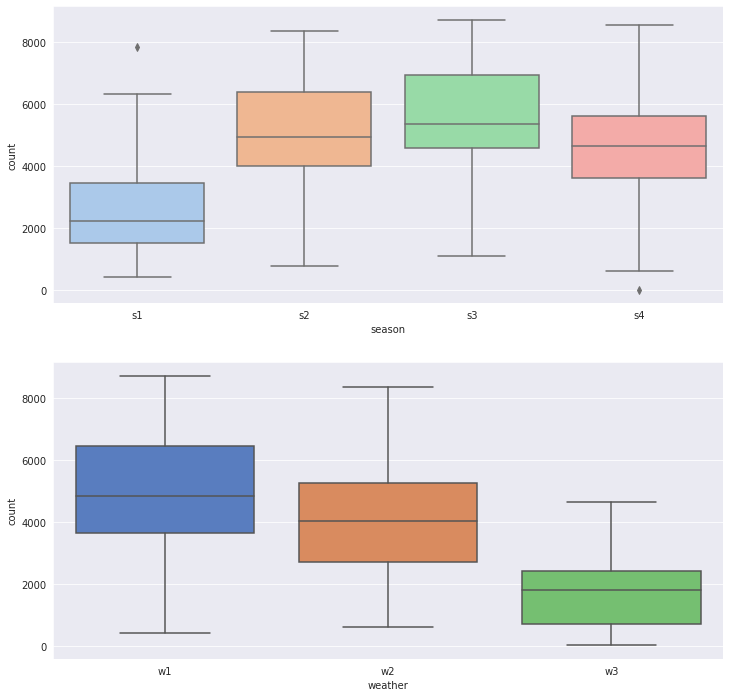

In [88]:
fig, ax = plt.subplots(2, 1, figsize=(12,12))
sns.boxplot(data=df, x='season', y='count', ax=ax[0])
sns.boxplot(data=df, x='weather', y='count', ax=ax[1], palette='muted')

> Demand is maximum in season 3 and weather 1, and minimum in season 1 and weather 3

> From external research I am quite sure that seasons are spring, summer, fall and winter.

> And weather values are Clear, Cloudy, Rainy. Which explains the statistics as well.



**Numerical Fields** ->

In [89]:
num_fields = ['temp', 'atemp', 'humidity', 'windspeed']

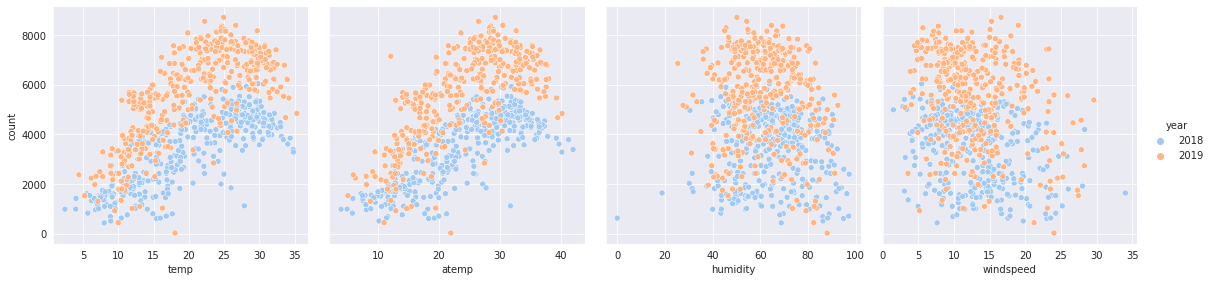

In [95]:
g = sns.PairGrid(df, y_vars=['count'], x_vars=num_fields, height=4, hue='year')
g.map(sns.scatterplot)
g.add_legend()


> Temperature (temp or atemp) has a linear relationship with count

**Plotting simple regression lines**

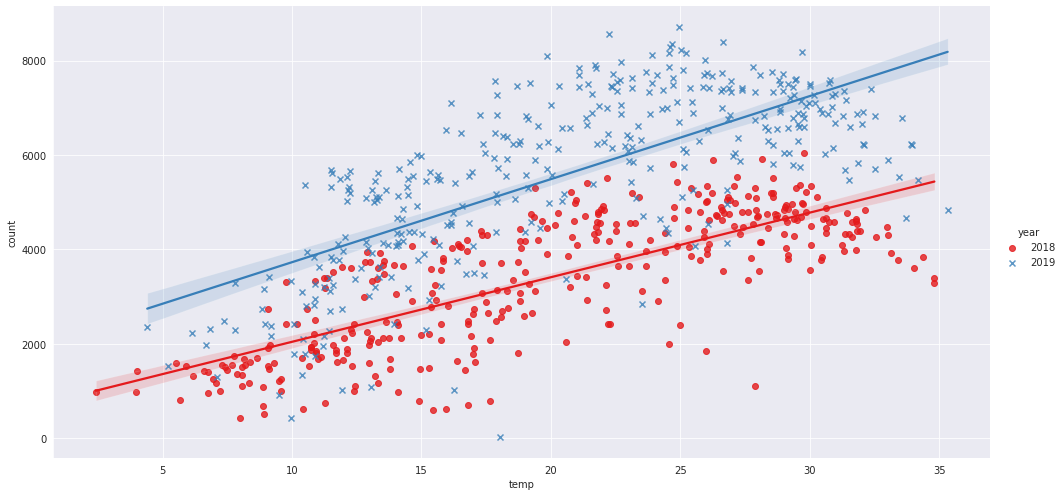

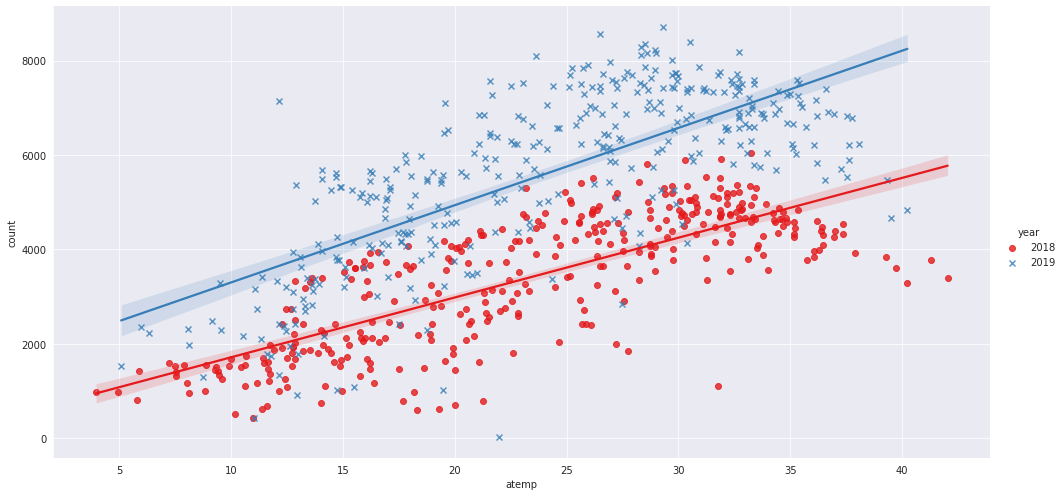

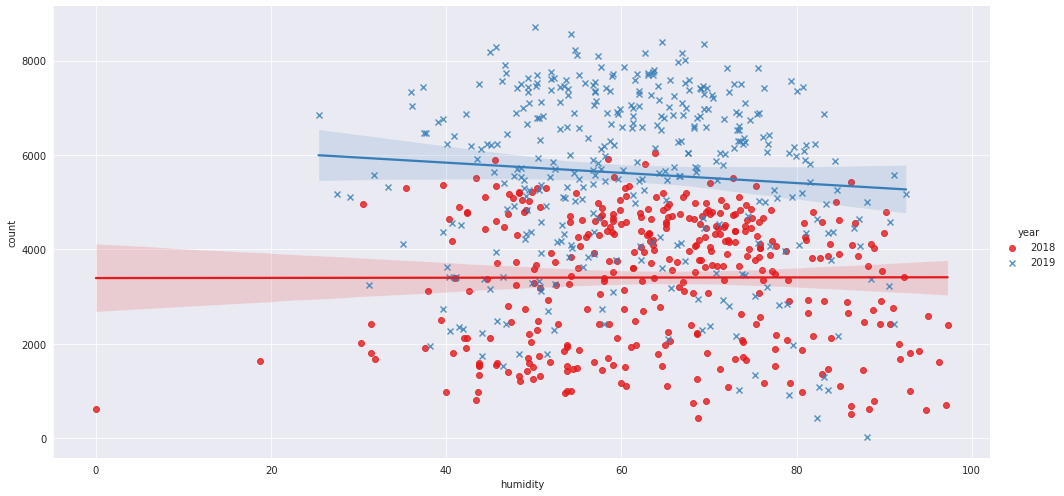

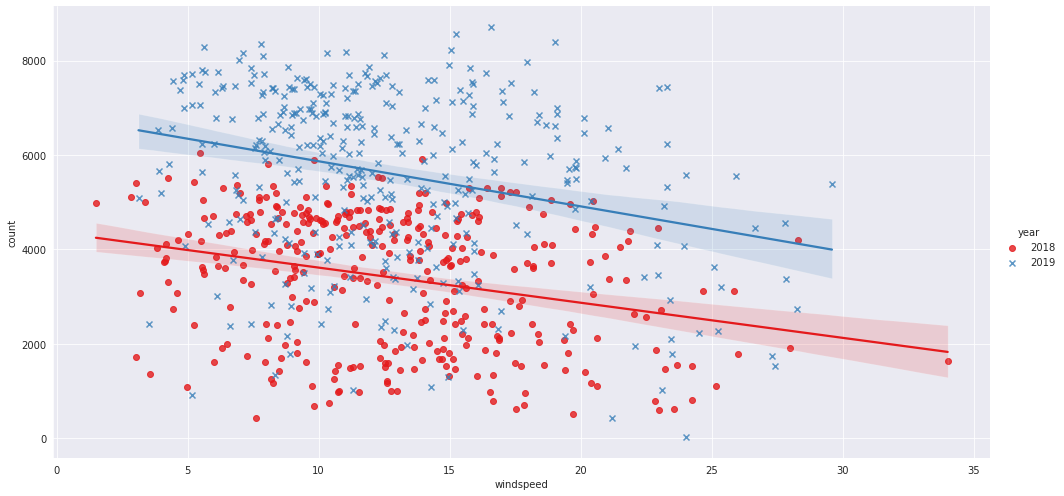

In [102]:
for col in num_cols:
  sns.lmplot(data=df, x=col, y='count', hue='year', markers=['o', 'x'], palette='Set1', height=7, aspect=2)

> This shows that windspeed also has a linear relationship with count, as it decreases with increasing windspeed.

> Humidity does not seem to affect count at all.

**The following variables seem to be the most correlated with dependent variable from visualization:**
- Months
- Seasons
- Weather
- Holiday
- Temperature
- windspeed




**Outlier analysis**

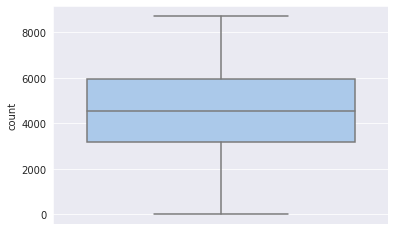

In [137]:
sns.boxplot(data=df,y="count",orient="v")

> No outliers based on boxplot. I will also try to remove them analytically based on distance from mean. If this distance is more than 3 times std-dev, the record will be removed.

In [136]:

q1 = df['count'].quantile(0.25)
q3 = df['count'].quantile(0.75)
iqr = q3 - q1

df_new = df[np.abs(df["count"]-df["count"].mean())<=(3*df["count"].std())]

print(f'Removed {df.shape[0] - df_new.shape[0]} rows')   ## also no outliers here


Removed 0 rows


**Correlation analysis**

> Before finding correlation, I will remove some redundant features.
> Both casual and registered are dependent variables, and we will drop them and keep only count.

In [138]:
df = df.drop(['casual', 'registered'], axis=1)

In [139]:
corr_df = df[num_cols + ['count']].corr()

In [140]:
corr_df

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
humidity,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
count,0.627044,0.630685,-0.098543,-0.235132,1.000000


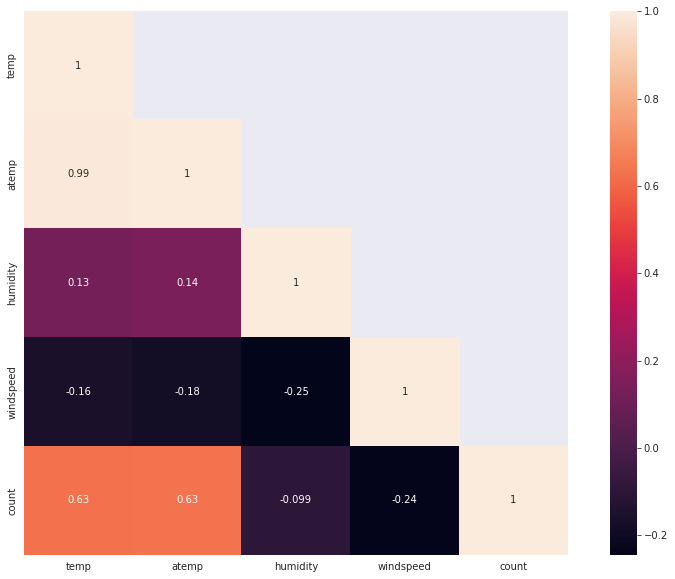

In [148]:
## plot heat map

mask = np.array(corr_df)
mask[np.tril_indices_from(mask)] = False  ## set the upper triangle to false

fig,ax= plt.subplots()
fig.set_size_inches(15,10)
sns.heatmap(corr_df, mask=mask, robust=True, annot=True , square=True)